In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import texture_synthesis as tex_syn

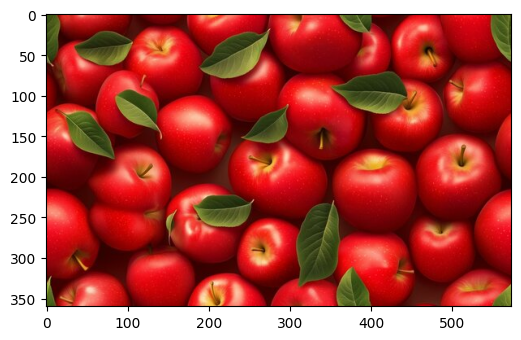

(360, 573, 3)


In [2]:
img=cv.imread("./pattern3.jpg")
img=cv.cvtColor(img,cv.COLOR_RGB2BGR)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.show()
print(img.shape)

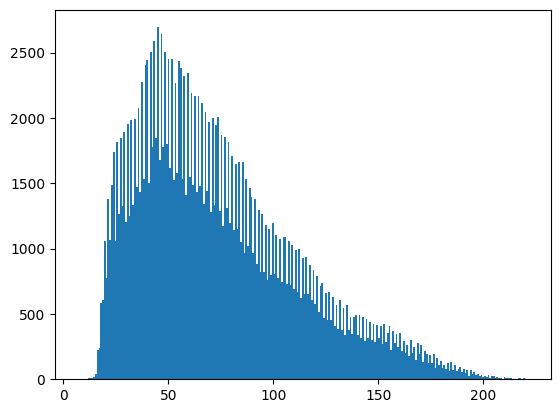

In [3]:
vals=img.mean(axis=2).flatten()
plt.hist(vals,bins=255)
plt.show()

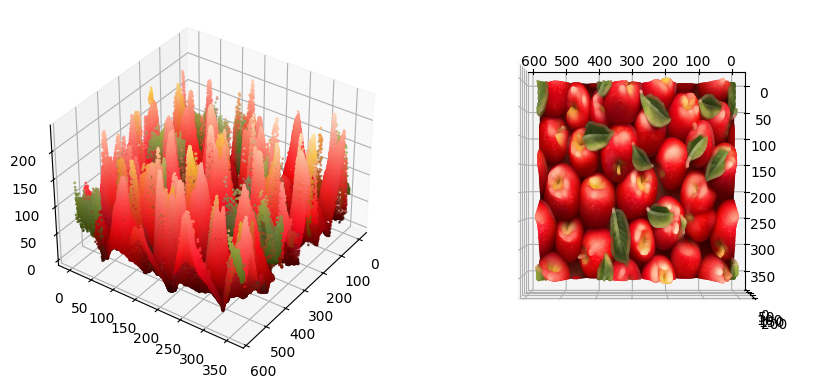

In [4]:
fig=plt.figure(figsize=(10, 6))
ax1=fig.add_subplot(1,2,1,projection='3d')
ax2=fig.add_subplot(1,2,2,projection='3d')
ax1.view_init(35,35)
ax2.view_init(90,0,-90)

x=[]
y=[]
z=[]

for i in range(img.shape[0]):
    x.append(i)
for i in range(img.shape[1]):
    y.append(i)

X,Y=np.meshgrid(y,x)
Z = np.dot(img[:,:,:], [0.2989, 0.5870, 0.1140])

colors = img.reshape(-1, 3) / 255.0

ax1.scatter(X.flatten(),Y.flatten(),Z.flatten(),c=colors,s=1)
ax2.scatter(X.flatten(),Y.flatten(),Z.flatten(),c=colors,s=1)
plt.show()

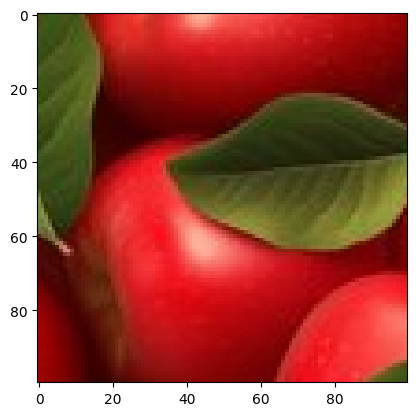

(100, 100, 3)


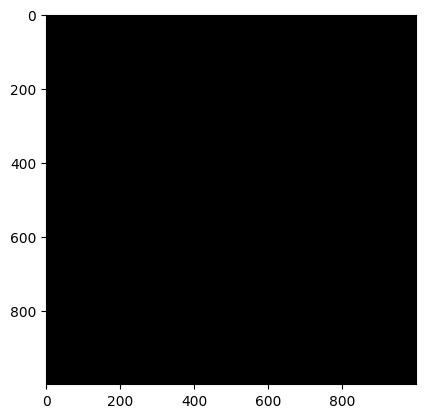

(1000, 1000, 3)


In [5]:
synthesis_img_size=(1000,1000,3)
block_size=(100,100,3)

synthesis_img=np.zeros(synthesis_img_size).astype(np.uint8)

plt.imshow(img[:block_size[0],:block_size[1]])
plt.show()
print(img[:block_size[0],:block_size[1]].shape)
plt.imshow(synthesis_img)
plt.show()
print(synthesis_img.shape)

### Generic Block Tiling

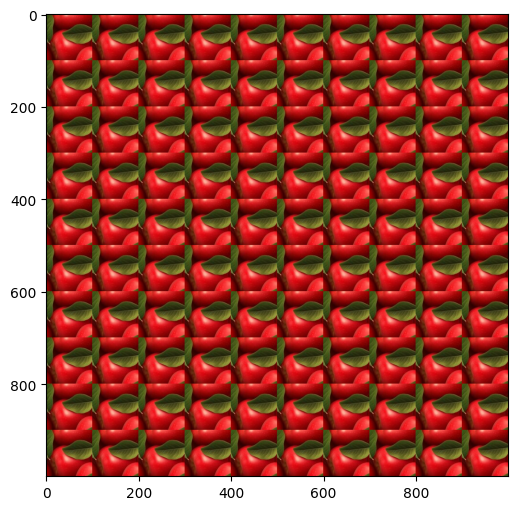

In [6]:
for i in range(0,synthesis_img.shape[0]):
    for j in range(0,synthesis_img.shape[1]):
        synthesis_img[i,j]=img[i%block_size[0],j%block_size[1]]
plt.figure(figsize=(6,6))
plt.imshow(synthesis_img)
plt.show()

### Random Block Tiling

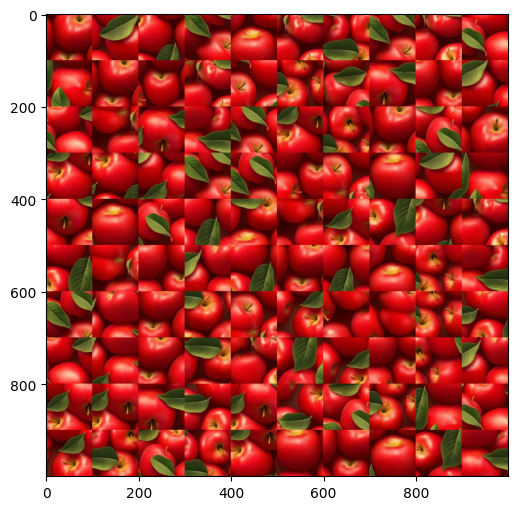

In [100]:
synthesis_img=tex_syn.primitive_texture_synthesis(img,synthesis_img_size,block_size,0,select_mode="random",fill_mode="default")
plt.figure(figsize=(6,6))
plt.imshow(synthesis_img)
plt.show()

### Random Block Tiling with Boundary Overlap

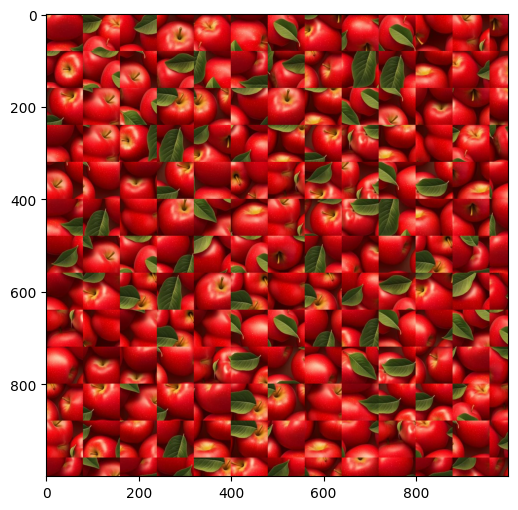

In [101]:
synthesis_img=tex_syn.primitive_texture_synthesis(img,synthesis_img_size,block_size,20,select_mode="random",fill_mode="default")
plt.figure(figsize=(6,6))
plt.imshow(synthesis_img)
plt.show()

### Random Block Tiling with Boundary Overlap and Minimum Error Boundary Cut

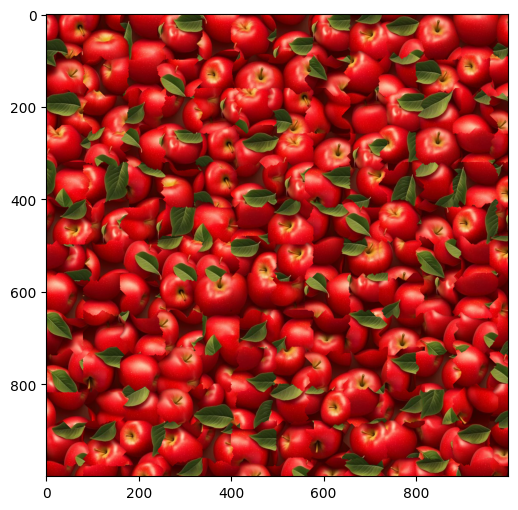

In [103]:
synthesis_img=tex_syn.primitive_texture_synthesis(img,synthesis_img_size,block_size,20,select_mode="random",fill_mode="min_boundary_cut")
plt.figure(figsize=(6,6))
plt.imshow(synthesis_img)
plt.show()

### Best Block Tiling with Boundary Overlap

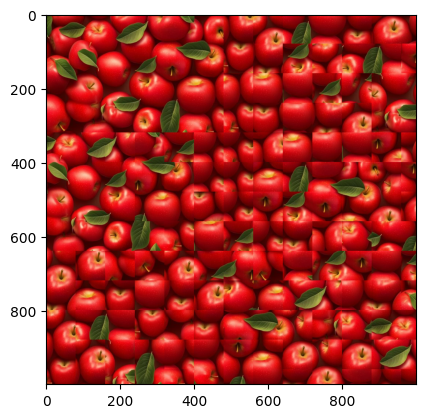

In [104]:
synthesis_img=tex_syn.primitive_texture_synthesis(img,synthesis_img_size,block_size,20,select_mode="best",fill_mode="default")
plt.imshow(synthesis_img)
plt.show()

### Best Block Tiling with Overlap and Min Boundary Cut

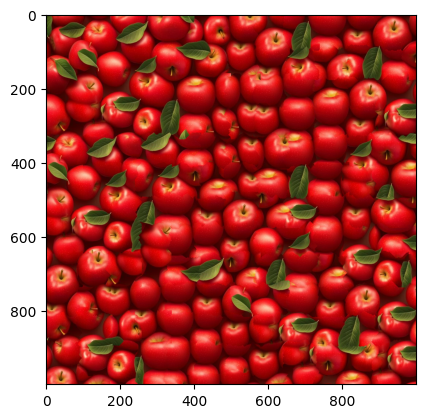

In [105]:
synthesis_img=tex_syn.primitive_texture_synthesis(img,synthesis_img_size,block_size,20,select_mode="best",fill_mode="min_boundary_cut")
plt.imshow(synthesis_img)
plt.show()

### Finding Error of Overlapping Region and Choosing Block within a Threshold Error

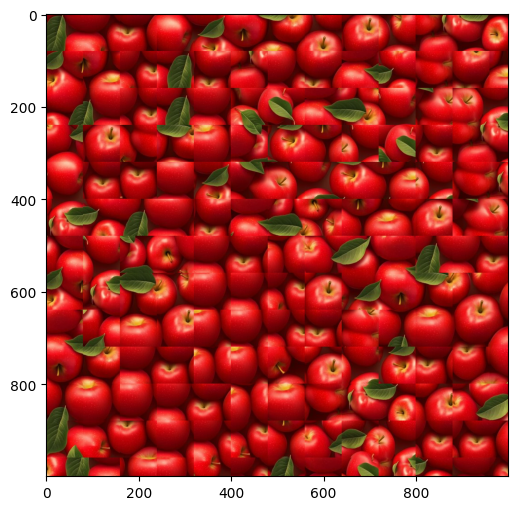

In [7]:
synthesis_img = tex_syn.quilt_simple(img,synthesis_img_size,block_size,overlap=20,tolerance=10,show_cut=False)
plt.figure(figsize=(6,6))
plt.imshow(synthesis_img)
plt.show()

### Finding Error of Template and Choosing Block with Least Error and using Min Boundary Cut

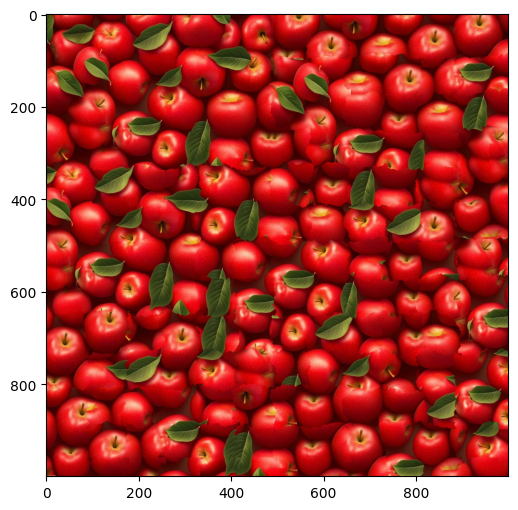

In [6]:
synthesis_img = tex_syn.quilt_cut(img,synthesis_img_size,block_size,overlap=20,tolerance=10,show_cut=False)
plt.figure(figsize=(6,6))
plt.imshow(synthesis_img)
plt.show()